This one has scans over ALL params

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [351]:
from common_plots import *

In [228]:
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_all_03_May_16_1859.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [229]:
store.close()

In [230]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [231]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [232]:
print 'relaxed constraints:', len(df_pass_all.index) 
print 'With ma1 < 10.5:', len(df_pass_all_ma1.index)


relaxed constraints: 35788
With ma1 < 10.5: 804


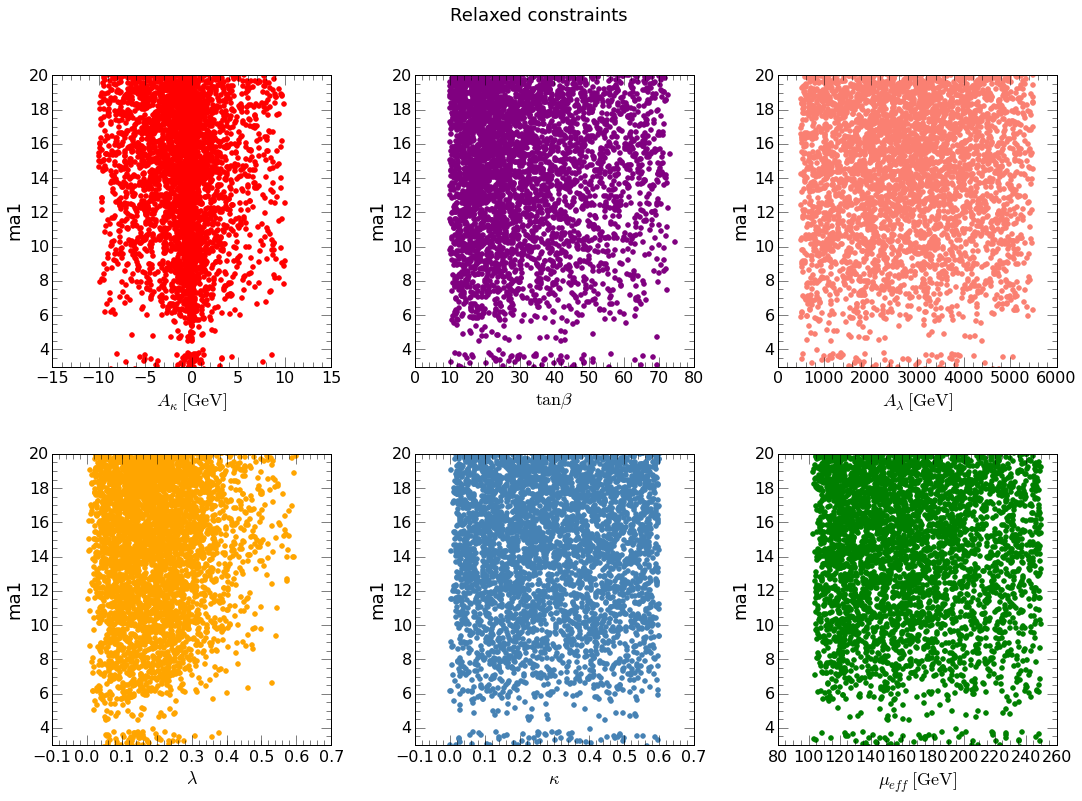

In [233]:
plot_input_params_scatters(df_pass_all, 'ma1', 'ma1', yrange=[3, 20], title='Relaxed constraints')

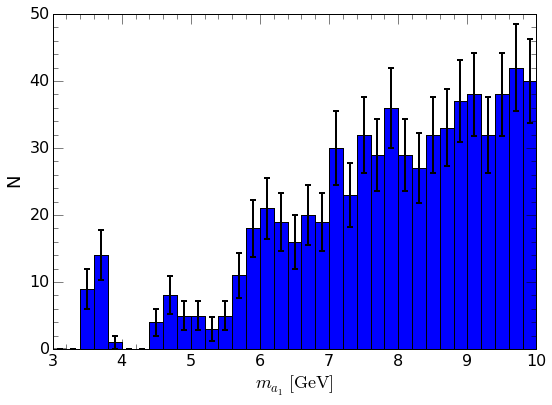

In [234]:
_ = plot_histogram(df=df_pass_all_ma1, var='ma1', range=[3, 10], bins=35, xlabel=r'$m_{a_1}\mathrm{\ [GeV]}$')

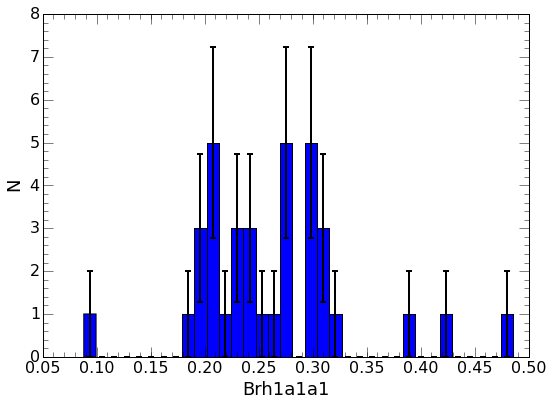

In [362]:
_ = plot_histogram(df=df_fail_NT_pass_HS_pass_HB.query('122<mh1<128 & ma1<10.5'), var='Brh1a1a1', bins=35)

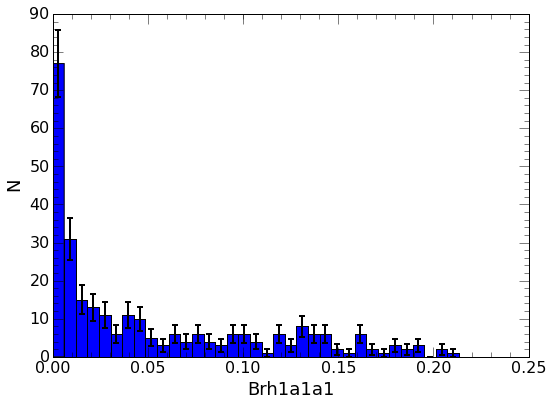

In [361]:
_ = plot_histogram(df=df_pass_NT_fail_HS_pass_HB.query('122<mh1<128 & ma1<10.5'), var='Brh1a1a1', bins=35)

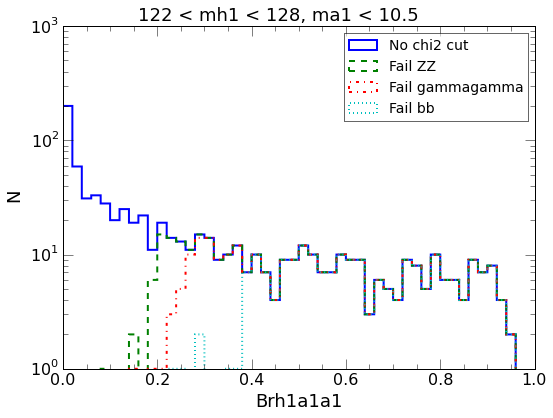

In [382]:
errbars = False
_ = plot_histogram(df=df_pass_all_ma1.query('122<mh1<128'), 
                   var='Brh1a1a1', bins=50, range=[0,1], histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.constraints.str.contains('ZZ')].query('122<mh1<128'), 
                   var='Brh1a1a1', bins=50, range=[0,1], histtype='step', errorbars=errbars, label='Fail ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.constraints.str.contains('gg')].query('122<mh1<128'), 
                   var='Brh1a1a1', bins=50, range=[0,1], histtype='step', errorbars=errbars, label='Fail gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.constraints.str.contains('bb')].query('122<mh1<128'), 
                   var='Brh1a1a1', bins=50, range=[0,1], histtype='step', errorbars=errbars, label='Fail bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

In [385]:
df_pass_all.query('xsec_8_ggf_h1_2a1_4mu>0.01')

,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,Brh1gammagamma,Brh1gg,Brh1mumu,Brh1tautau,Brh1ww,Brh1zgamma,Brh1zz,Brh2a1a1,Brh2a1z,Brh2bb,Brh2gammagamma,Brh2gg,Brh2h1h1,Brh2tautau,Brh2ww,Brh2zgamma,Brh2zz,Del_a_mu,HBchannel,HBobsratio,HBresult,HSchi2,HSnobs,HSprob,a1bbrc2,a1ggrc2,a1tautaurc2,ad3,ae2,ae3,akappa,alambda,au3,bsgamma,bsmumu,btaunu,constraints,delmd,delms,file,h1bbrc2,h1ggrc2,h1vvrc2,h2bbrc2,h2ggrc2,h2vvrc2,h3bbrc2,h3ggrc2,h3vvrc2,kappa,lambda_,m1,m2,m3,ma1,ma2,mchargino1,md2,md3,me2,me3,mgluino,mh1,mh2,mh3,mhc,ml2,ml3,mneutralino1,mneutralino2,mq2,mq3,msbottom1,msbottom2,mstop1,mstop2,mu2,mu3,mueff,omega,rd,rds,tgbeta,mass_ind_h1,mass_ind_h2,mass_ind_h3,xsec_ggf13_h1,xsec_ggf13_h2,xsec_ggf13_h3,xsec_vbf13_h1,...,xsec_8_ggf_h2_2h1_2b2mu,xsec_scaled_ggf_h2_2h1_2tau2b,xsec_13_ggf_h2_2h1_2tau2b,xsec_8_ggf_h2_2h1_2tau2b,xsec_scaled_ggf_h2_2h1_4tau,xsec_13_ggf_h2_2h1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_scaled_ggf_h2_2h1_2tau2mu,xsec_13_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_scaled_ggf_h2_2h1_2mu2b,xsec_13_ggf_h2_2h1_2mu2b,xsec_8_ggf_h2_2h1_2mu2b,xsec_scaled_ggf_h2_2h1_2mu2tau,xsec_13_ggf_h2_2h1_2mu2tau,xsec_8_ggf_h2_2h1_2mu2tau,xsec_scaled_ggf_h2_2h1_4mu,xsec_13_ggf_h2_2h1_4mu,xsec_8_ggf_h2_2h1_4mu,xsec_scaled_vbf_h1_2a1_4b,xsec_13_vbf_h1_2a1_4b,xsec_8_vbf_h1_2a1_4b,xsec_scaled_vbf_h1_2a1_2b2tau,xsec_13_vbf_h1_2a1_2b2tau,xsec_8_vbf_h1_2a1_2b2tau,xsec_scaled_vbf_h1_2a1_2b2mu,xsec_13_vbf_h1_2a1_2b2mu,xsec_8_vbf_h1_2a1_2b2mu,xsec_scaled_vbf_h1_2a1_2tau2b,xsec_13_vbf_h1_2a1_2tau2b,xsec_8_vbf_h1_2a1_2tau2b,xsec_scaled_vbf_h1_2a1_4tau,xsec_13_vbf_h1_2a1_4tau,xsec_8_vbf_h1_2a1_4tau,xsec_scaled_vbf_h1_2a1_2tau2mu,xsec_13_vbf_h1_2a1_2tau2mu,xsec_8_vbf_h1_2a1_2tau2mu,xsec_scaled_vbf_h1_2a1_2mu2b,xsec_13_vbf_h1_2a1_2mu2b,xsec_8_vbf_h1_2a1_2mu2b,xsec_scaled_vbf_h1_2a1_2mu2tau,xsec_13_vbf_h1_2a1_2mu2tau,xsec_8_vbf_h1_2a1_2mu2tau,xsec_scaled_vbf_h1_2a1_4mu,xsec_13_vbf_h1_2a1_4mu,xsec_8_vbf_h1_2a1_4mu,xsec_scaled_vbf_h2_2a1_4b,xsec_13_vbf_h2_2a1_4b,xsec_8_vbf_h2_2a1_4b,xsec_scaled_vbf_h2_2a1_2b2tau,xsec_13_vbf_h2_2a1_2b2tau,xsec_8_vbf_h2_2a1_2b2tau,xsec_scaled_vbf_h2_2a1_2b2mu,xsec_13_vbf_h2_2a1_2b2mu,xsec_8_vbf_h2_2a1_2b2mu,xsec_scaled_vbf_h2_2a1_2tau2b,xsec_13_vbf_h2_2a1_2tau2b,xsec_8_vbf_h2_2a1_2tau2b,xsec_scaled_vbf_h2_2a1_4tau,xsec_13_vbf_h2_2a1_4tau,xsec_8_vbf_h2_2a1_4tau,xsec_scaled_vbf_h2_2a1_2tau2mu,xsec_13_vbf_h2_2a1_2tau2mu,xsec_8_vbf_h2_2a1_2tau2mu,xsec_scaled_vbf_h2_2a1_2mu2b,xsec_13_vbf_h2_2a1_2mu2b,xsec_8_vbf_h2_2a1_2mu2b,xsec_scaled_vbf_h2_2a1_2mu2tau,xsec_13_vbf_h2_2a1_2mu2tau,xsec_8_vbf_h2_2a1_2mu2tau,xsec_scaled_vbf_h2_2a1_4mu,xsec_13_vbf_h2_2a1_4mu,xsec_8_vbf_h2_2a1_4mu,xsec_scaled_vbf_h2_2h1_4b,xsec_13_vbf_h2_2h1_4b,xsec_8_vbf_h2_2h1_4b,xsec_scaled_vbf_h2_2h1_2b2tau,xsec_13_vbf_h2_2h1_2b2tau,xsec_8_vbf_h2_2h1_2b2tau,xsec_scaled_vbf_h2_2h1_2b2mu,xsec_13_vbf_h2_2h1_2b2mu,xsec_8_vbf_h2_2h1_2b2mu,xsec_scaled_vbf_h2_2h1_2tau2b,xsec_13_vbf_h2_2h1_2tau2b,xsec_8_vbf_h2_2h1_2tau2b,xsec_scaled_vbf_h2_2h1_4tau,xsec_13_vbf_h2_2h1_4tau,xsec_8_vbf_h2_2h1_4tau,xsec_scaled_vbf_h2_2h1_2tau2mu,xsec_13_vbf_h2_2h1_2tau2mu,xsec_8_vbf_h2_2h1_2tau2mu,xsec_scaled_vbf_h2_2h1_2mu2b,xsec_13_vbf_h2_2h1_2mu2b,xsec_8_vbf_h2_2h1_2mu2b,xsec_scaled_vbf_h2_2h1_2mu2tau,xsec_13_vbf_h2_2h1_2mu2tau,xsec_8_vbf_h2_2h1_2mu2tau,xsec_scaled_vbf_h2_2h1_4mu,xsec_13_vbf_h2_2h1_4mu,xsec_8_vbf_h2_2h1_4mu
3897,NaN,0.009765,0.338299,0.092202,0.559717,NaN,0.143371,6.341057e-14,0.489027,0.023154,0.002105,0.048101,1.901595e-04,5.372406e-02,0.213516,0.001567,0.024884,0.798579,6.586399e-09,0.000167,8.343575e-07,1.824221e-06,0.002065,0.000028,0.004308,1.220026e-06,0.002103,7.707764e-10,539.0,0.598962,1.0,153.441041,89,2.638000e-05,0.021566,0.003763,0.024770,2605.716830,-1805.643780,1421.087860,-5.018699,2698.127080,4767.03584,0.000430,5.412411e-09,0.000106,Relic density too small (Planck)|b -> c tau nu more than 2 sigma away (as SM),0.512560,18.080111,jobs_500_MICRO_SCAN_NTv491_HBv431_HSv140_all_03_May_16_1859/spectr_PROTO_all_5

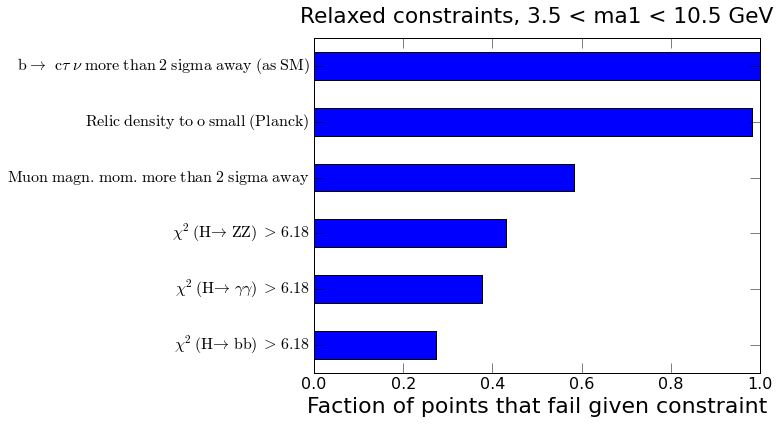

In [235]:
plot_constraints(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV')

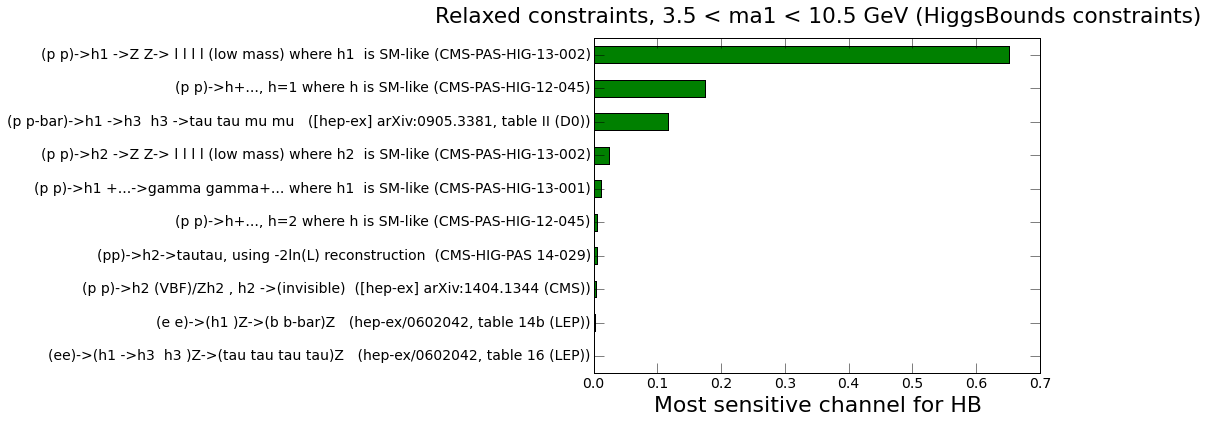

In [236]:
plot_constraints_HB(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

In [237]:
# We need to divide up the dataset into several groupings:
# - pass NT chi2 or fail
# - pass HS chi2 or fail
# - pass HB or fail

fail_NT_chi2 = df_pass_all.constraints.str.contains('chi2')
pass_NT_chi2 = ~ fail_NT_chi2

fail_HS = df_pass_all.HSprob < 0.05
pass_HS = ~fail_HS

fail_HB = df_pass_all.HBresult == 0
pass_HB = ~fail_HB

In [238]:
pass_gm2 = ~df_pass_all.constraints.str.contains('Muon')
pass_relic = ~df_pass_all.constraints.str.contains('Relic')

In [239]:
df_fail_NT_fail_HS_fail_HB = df_pass_all[fail_NT_chi2 & fail_HS & fail_HB]
df_fail_NT_fail_HS_pass_HB = df_pass_all[fail_NT_chi2 & fail_HS & pass_HB]

df_fail_NT_pass_HS_fail_HB = df_pass_all[fail_NT_chi2 & pass_HS & fail_HB]
df_fail_NT_pass_HS_pass_HB = df_pass_all[fail_NT_chi2 & pass_HS & pass_HB]

df_pass_NT_pass_HS_fail_HB = df_pass_all[pass_NT_chi2 & pass_HS & fail_HB]
df_pass_NT_pass_HS_pass_HB = df_pass_all[pass_NT_chi2 & pass_HS & pass_HB]
df_pass_NT_fail_HS_fail_HB = df_pass_all[pass_NT_chi2 & fail_HS & fail_HB]
df_pass_NT_fail_HS_pass_HB = df_pass_all[pass_NT_chi2 & fail_HS & pass_HB]

In [240]:
print 'Fail NT, fail HS, fail HB:', len(df_fail_NT_fail_HS_fail_HB.index)
print 'Fail NT, fail HS, pass HB:', len(df_fail_NT_fail_HS_pass_HB.index)
print 'Fail NT, pass HS, fail HB:', len(df_fail_NT_pass_HS_fail_HB.index)
print 'Fail NT, pass HS, pass HB:', len(df_fail_NT_pass_HS_pass_HB.index)
print 'Pass NT, pass HS, fail HB:', len(df_pass_NT_pass_HS_fail_HB.index)
print 'Pass NT, pass HS, pass HB:', len(df_pass_NT_pass_HS_pass_HB.index)
print 'Pass NT, fail HS, fail HB:', len(df_pass_NT_fail_HS_fail_HB.index)
print 'Pass NT, fail HS, pass HB:', len(df_pass_NT_fail_HS_pass_HB.index)

Fail NT, fail HS, fail HB: 104
Fail NT, fail HS, pass HB: 13043
Fail NT, pass HS, fail HB: 0
Fail NT, pass HS, pass HB: 1327
Pass NT, pass HS, fail HB: 0
Pass NT, pass HS, pass HB: 8516
Pass NT, fail HS, fail HB: 267
Pass NT, fail HS, pass HB: 12531


In [241]:
df_fail_NT_fail_HS_fail_HB.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HSchi2', 'HSnobs', 'HSprob', 'a1bbrc2', 'a1ggrc2', 'a1tautaurc2',
       'ad3', 'ae2', 'ae3', 'akappa', 'alambda', 'au3', 'bsgamma',
       'bsmumu', 'btaunu', 'constraints', 'delmd', 'delms', 'file',
       'h1bbrc2', 'h1ggrc2', 'h1vvrc2', 'h2bbrc2', 'h2ggrc2', 'h2vvrc2',
       'h3bbrc2', 'h3ggrc2', 'h3vvrc2', 'kappa', 'lambda_', 'm1', 'm2',
       'm3', 'ma1', 'ma2', 'mchargino1', 'md2', 'md3', 'me2', 'me3',
       'mgluino', 'mh1', 'mh2', 'mh3', 'mhc', 'ml2', 'ml3', 'mneutralino1',
       'mneutralino2', 'mq2', 'mq3', 'msbottom1', 'msbottom2', 'mstop1',
       'mstop2', 

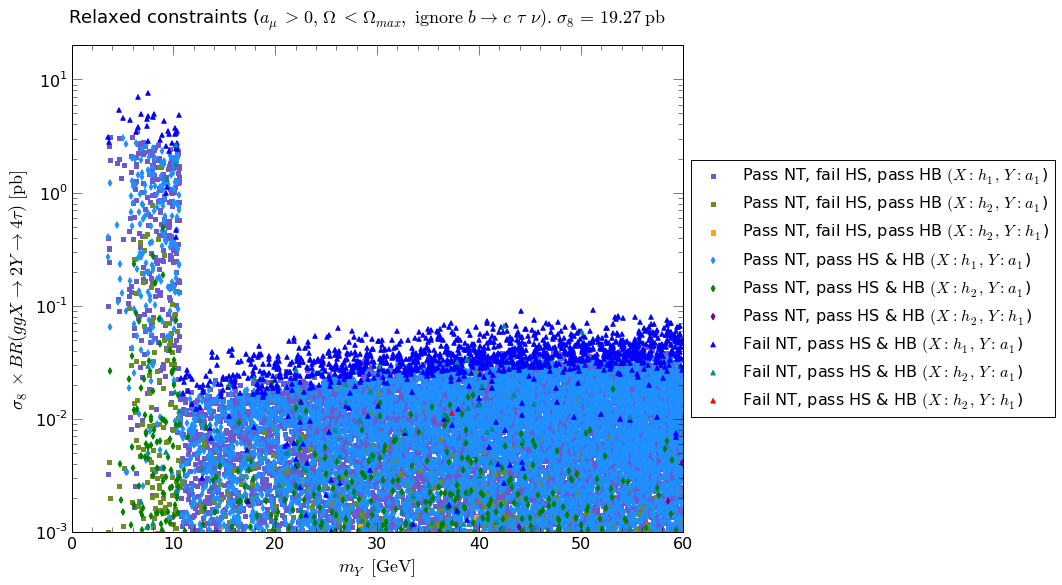

In [242]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 20)
plt.xlim(0, 60)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

(<matplotlib.axes._subplots.AxesSubplot at 0x14a4ec590>,
 <matplotlib.collections.PathCollection at 0x14a582c10>)

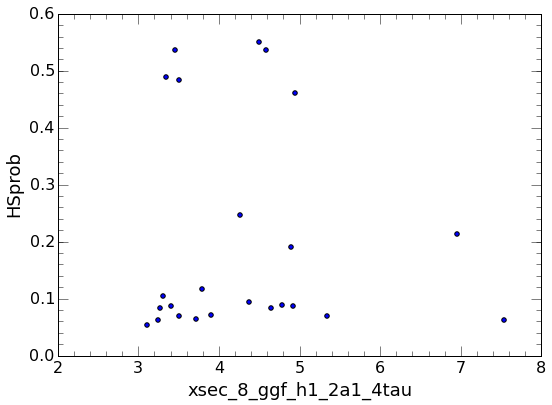

In [243]:
plot_scatter(df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>3'), xvar='xsec_8_ggf_h1_2a1_4tau', yvar='HSprob')

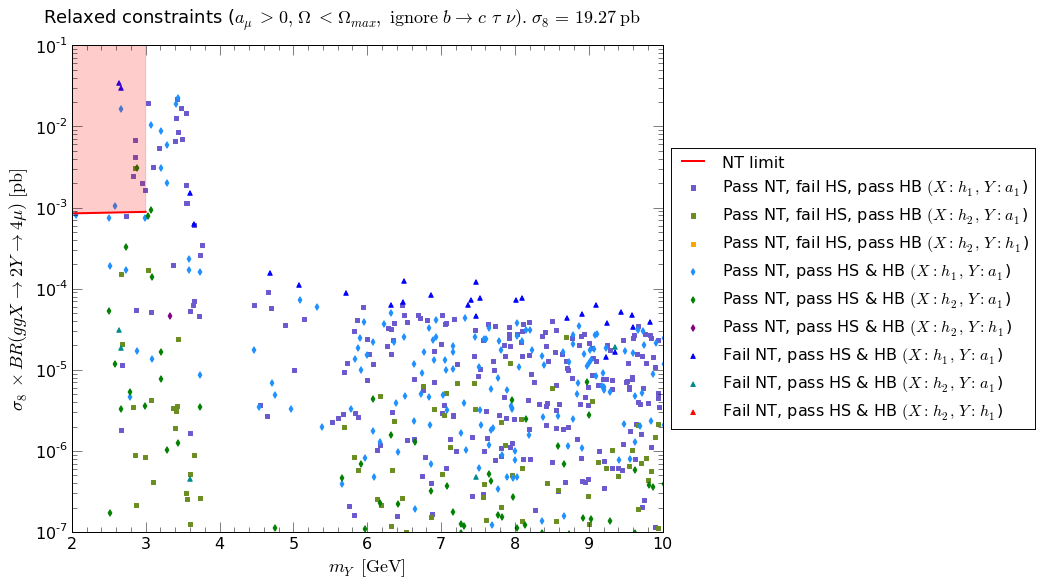

In [411]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4mu' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4mu' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4mu' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\mu)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

m_4mu = [0.25, 0.5, 0.75, 1, 2, 3]
xsec_4mu = [3.8E-3, 3.6E-3, 4.1E-3, 4.2E-3, 4.4E-3, 4.6E-3] # these are percentages not fractions!
xsec_4mu = [19.27 * x * 1E-2 for x in xsec_4mu]
plt.plot(m_4mu, xsec_4mu, 'r', label='NT limit', linewidth=2)
y_top = plt.ylim()[1]
upper_edge = np.ones_like(m_4mu) * y_top
plt.fill_between(m_4mu, xsec_4mu,
                 y2=upper_edge,
                 color='red',
                 alpha=0.2, label='NT exclude 4mu')
plt.ylim(1E-7, 0.1)
plt.xlim(2, 10)
plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))


In [409]:
df_pass_all.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HSchi2', 'HSnobs', 'HSprob', 'a1bbrc2', 'a1ggrc2', 'a1tautaurc2',
       'ad3', 'ae2', 'ae3', 'akappa', 'alambda', 'au3', 'bsgamma',
       'bsmumu', 'btaunu', 'constraints', 'delmd', 'delms', 'file',
       'h1bbrc2', 'h1ggrc2', 'h1vvrc2', 'h2bbrc2', 'h2ggrc2', 'h2vvrc2',
       'h3bbrc2', 'h3ggrc2', 'h3vvrc2', 'kappa', 'lambda_', 'm1', 'm2',
       'm3', 'ma1', 'ma2', 'mchargino1', 'md2', 'md3', 'me2', 'me3',
       'mgluino', 'mh1', 'mh2', 'mh3', 'mhc', 'ml2', 'ml3', 'mneutralino1',
       'mneutralino2', 'mq2', 'mq3', 'msbottom1', 'msbottom2', 'mstop1',
       'mstop2', 

In [408]:
df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4mu>1E-2 & ma1<3')[['xsec_8_ggf_h1_2a1_4mu', 'ma1', 'h1ggrc2', 'Brh1a1a1', 'Bra1mumu']]

,xsec_8_ggf_h1_2a1_4mu,ma1,h1ggrc2,Brh1a1a1,Bra1mumu
161559,0.016561,2.659343,0.996251,0.111873,0.08788


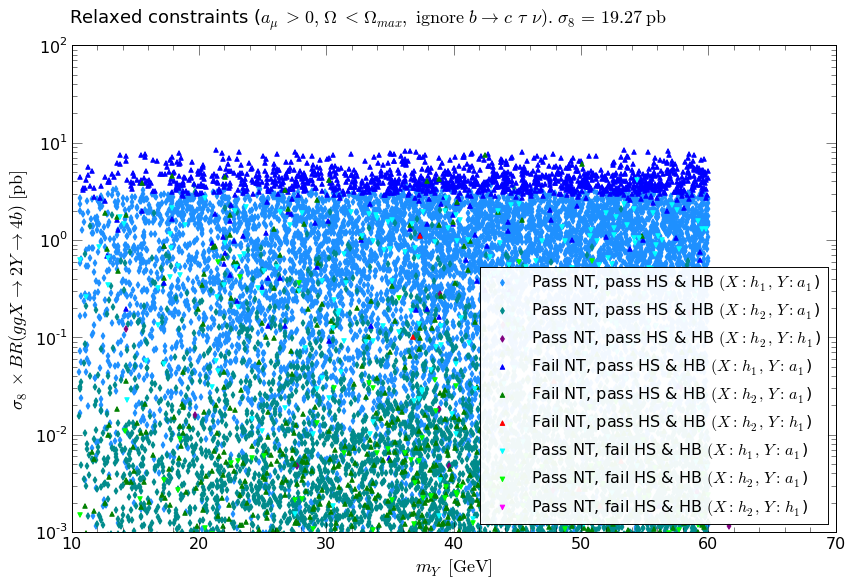

In [244]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4b' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4b' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4b' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4b)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 100)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

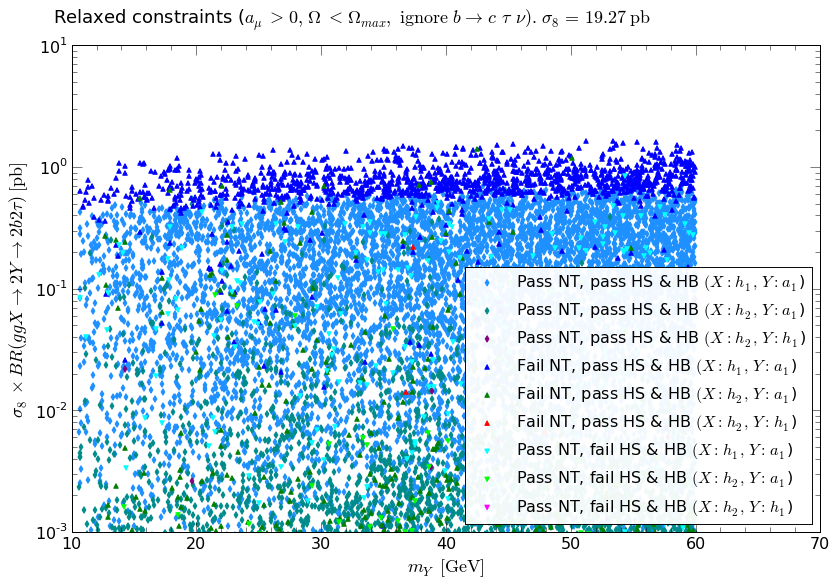

In [245]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_2b2tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_2b2tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_2b2tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 2b2\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 10)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

In [246]:
# Save to CSV for portability
import os
odir = 'range_all_final_relaxed'
if not os.path.isdir(odir):
    os.makedirs(odir)
col_list=['ma1', 'mh1', 'mh2', 
          'xsec_8_ggf_h1_2a1_4tau', 'xsec_8_ggf_h2_2a1_4tau', 'xsec_8_ggf_h2_2h1_4tau', 
          'xsec_8_ggf_h1_2a1_4b', 'xsec_8_ggf_h2_2a1_4b', 'xsec_8_ggf_h2_2h1_4b', 
          'xsec_8_ggf_h1_2a1_2b2tau', 'xsec_8_ggf_h2_2a1_2b2tau', 'xsec_8_ggf_h2_2h1_2b2tau',
          'xsec_8_ggf_h1_2a1_2tau2mu', 'xsec_8_ggf_h2_2a1_2tau2mu', 'xsec_8_ggf_h2_2h1_2tau2mu',
          'xsec_8_ggf_h1_2a1_4mu', 'xsec_8_ggf_h2_2a1_4mu', 'xsec_8_ggf_h2_2h1_4mu']

df_fail_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)

In [247]:
df_fail_NT_fail_HS_fail_HB[col_list].query('ma1<4')

,ma1,mh1,mh2,xsec_8_ggf_h1_2a1_4tau,xsec_8_ggf_h2_2a1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_8_ggf_h1_2a1_4b,xsec_8_ggf_h2_2a1_4b,xsec_8_ggf_h2_2h1_4b,xsec_8_ggf_h1_2a1_2b2tau,xsec_8_ggf_h2_2a1_2b2tau,xsec_8_ggf_h2_2h1_2b2tau,xsec_8_ggf_h1_2a1_2tau2mu,xsec_8_ggf_h2_2a1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h1_2a1_4mu,xsec_8_ggf_h2_2a1_4mu,xsec_8_ggf_h2_2h1_4mu
110845,3.180511,123.56466,138.798454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021861,0.01726,NaN


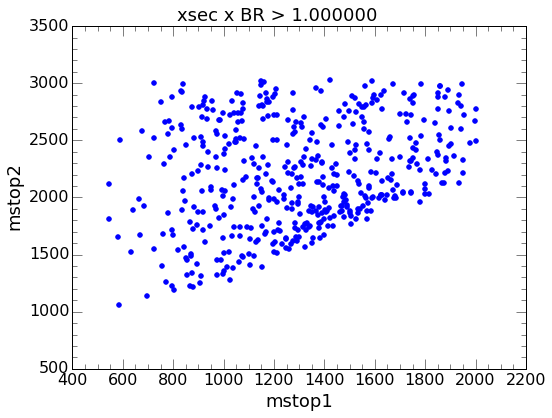

In [249]:
limit = 1
plot_scatter(df=df_pass_all.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue')
plt.suptitle('xsec x BR > %f' % limit)

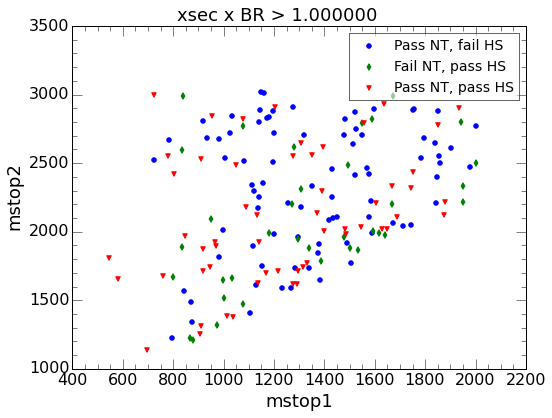

In [334]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

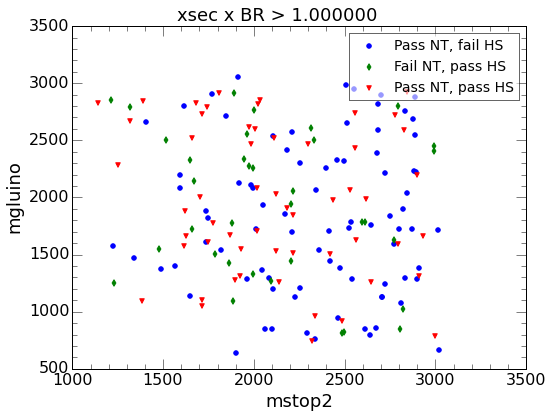

In [335]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

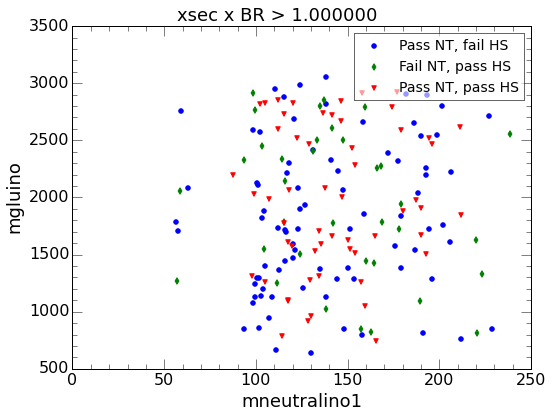

In [336]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

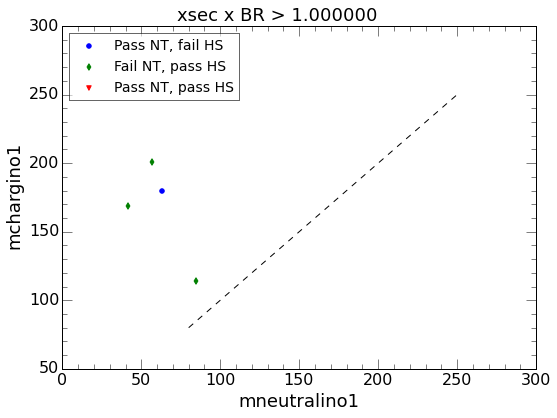

In [339]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([80, 250], [80, 250], 'k--')

(0, 40)

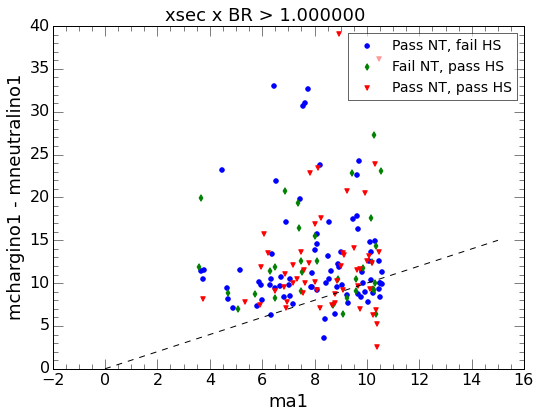

In [338]:
limit = 1
plot_scatter(xarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), xarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), xarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='red', label='Pass NT, pass HS', marker='v')
plt.ylabel('mchargino1 - mneutralino1')
plt.xlabel('ma1')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([0, 15], [0, 15], 'k--')
plt.ylim([0, 40])

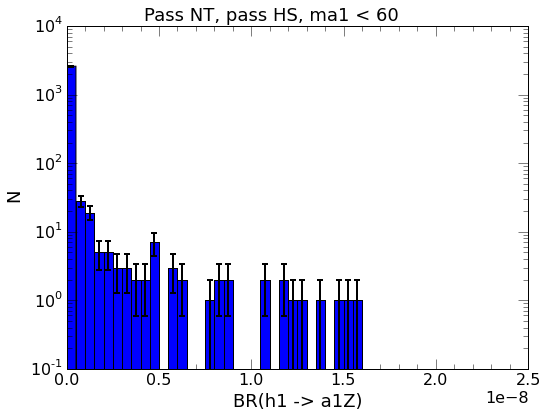

In [332]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh1a1z.dropna().values, bins=40, range=[0, 2E-8])
plt.yscale('log')
plt.xlabel('BR(h1 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

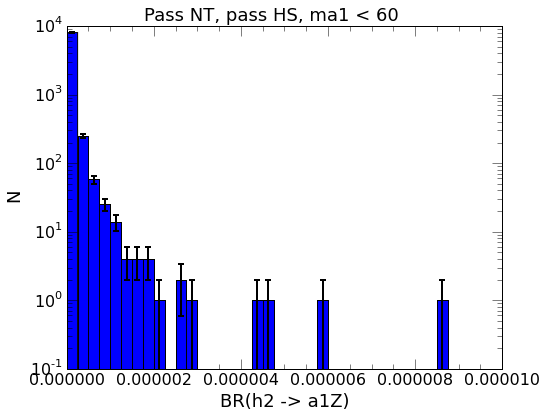

In [333]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh2a1z.dropna().values, bins=40, range=[0, 0.00001])
plt.yscale('log')
plt.xlabel('BR(h2 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

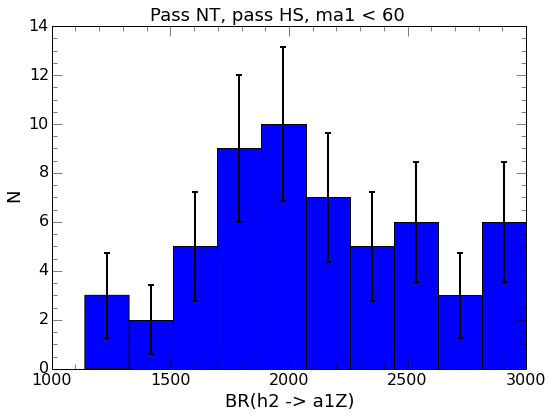

In [347]:
_ = plot_histogram(df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>1'), var='mstop2')
# plt.yscale('log')
plt.xlabel('BR(h2 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')